In [1]:
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_pickle('df2.pkl')

In [3]:
df

,date,page,size,min_x,min_y,max_x,max_y,w,h,image_url,ocr_url,ocr,year,len
22892,1958-09-20,11,172160,4289,6470,4969,6741,680,271,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ABCDDD:01087...,"Spoedig ontslag Adams? NEW VORK, 17 sept. (Reu...",1958,32
42688,1956-08-10,3,210596,4258,6228,4917,6619,659,391,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ABCDDD:01084...,Uit de Volkskrant van 10 augustus 1931: Een te...,1956,57
11258,1956-03-31,2,937006,2871,3207,4256,6087,1385,2880,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ABCDDD:01084...,Onbevredigend In zijn laatste overweging van d...,1956,140
36487,1976-01-31,49,1432773,80,3972,1196,5325,1116,1353,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ABCDDD:01088...,"ZONDAG «SFUndi * TELEAC: Pech onderweg, les 4....",1976,105
28833,1964-03-16,9,1289463,2147,736,2828,2710,681,1974,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ABCDDD:01087...,Triebelsbeker voor HDZ (Van onze verslaggever)...,1964,249
16053,1993-11-27,27,2239088,45,5675,2984,6558,2939,883,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ABCDDD:01086...,SPORTUITSLAGEN S>TON (ubePp indeling WK landen...,1993,389
40015,1970-08-17,4,431817,2863,1937,3513,2647,650,710,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ABCDDD:01085...,Giftig middel In New Vork heeft de democraat R...,1970,77
8176,1979-08-09,13,3278231,633,3344,4029,4452,3396,1108,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ABCDDD:01088...,Moeizaam rentree Connors INDIANAPOLIS (Reuter)...,1979,335
4509,1967-01-28,8,363543,4222,3663,4920,4205,698,542,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ABCDDD:01084...,Linkse katholieler ot i»K^€i' V raadde ons aan...,1967,85
16420,1971-08-11,11,3869634,2065,4548,4112,6594,2047,2046,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ABCDDD:01084...,EINDELIJK WERELDRECORD (Van onze sportredactie...,1971,294


In [4]:
yearly_counts = df.groupby('year')['ocr'].count()

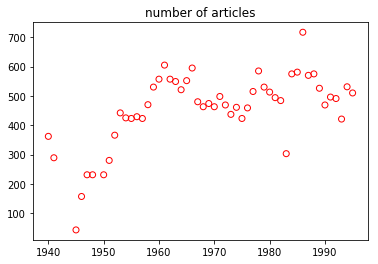

In [5]:
plt.scatter(yearly_counts.index, yearly_counts, facecolors='none', edgecolors='r')
plt.title('number of articles')
plt.show()

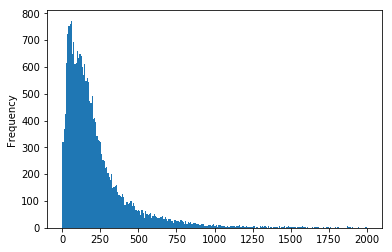

In [9]:
df[df['len'] < 2000]['len'].plot(kind='hist', bins=250)

In [ ]:
for year, group in df.groupby('year'):
            print('making sentences: {}'.format(year))
            group['sentences'] = group['ocr'].apply(article_to_sentences)
            
            

In [32]:
df.to_pickle('vk_preprocessed.pkl')

In [34]:
df['year'].value_counts()

1981    47681
Name: year, dtype: int64

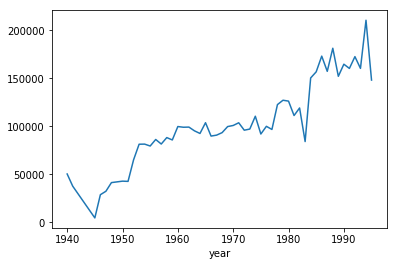

In [12]:
df.groupby('year')['len'].sum().plot()